# **Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights**

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

## **Load Data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

## **Part 1: Understanding Product Categories**

#### **Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?**

#### **Frequency Tables:**

Generate a frequency table for the product category. Which are the top 5 most listed product categories?

In [3]:
frequency_table = df['category'].value_counts()

In [4]:
frequency_table[:5]

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

#### **Visualizations:**
Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

<Axes: xlabel='category'>

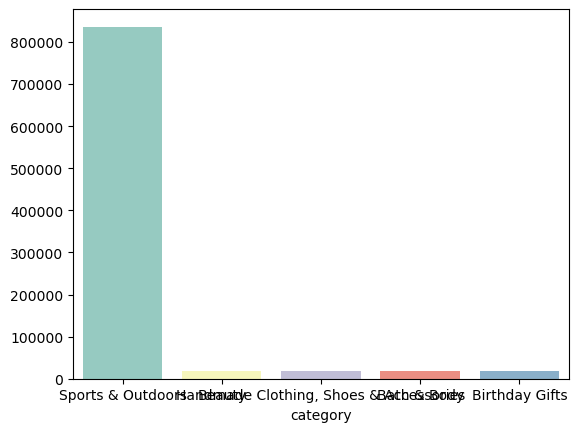

In [5]:
category_top_5 = frequency_table[:5]
sns.barplot(x=category_top_5.index, y=category_top_5.values, palette="Set3")

<Axes: ylabel='count'>

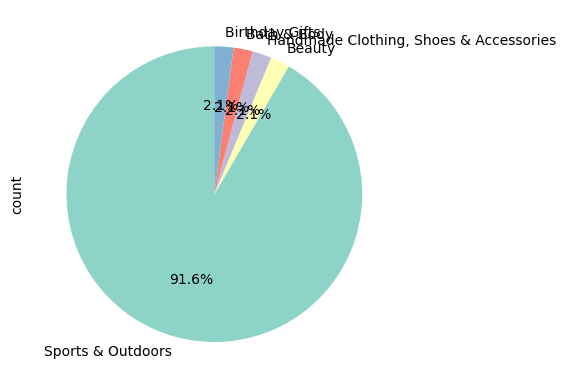

In [6]:
category_top_5.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

Yes, one category does dominate the listings - sports and outdoors.

## **Part 2: Delving into Product Pricing**

#### **Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?**

#### **Measures of Centrality:**

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [7]:
mean_price = round(df['price'].mean(), 2)
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

In [8]:
print("The mean price is:", mean_price)
print("The median price is:", median_price)
print("The mode price is:", mode_price)

The mean price is: 89.24
The median price is: 19.09
The mode price is: 9.99


The average price point of the products listed is 89.24. The most common price point is 9.99. The mode is significantly lower than the average which suggests that the data is skewed by a number of high priced items. 

#### **Measures of Dispersion:**

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

In [9]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])
iqr_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)

In [10]:
print("The variance is:", variance_price)
print("The standard deviation is:", std_dev_price)
print("The minimum price is:", min_price)
print("The maximum price is:", max_price)
print("The price range is:", range_price)
print("The price quantiles are:", quantiles_price)
print("The interquartile range is:", iqr_price)

The variance is: 119445.4853225653
The standard deviation is: 345.6088617535223
The minimum price is: 0.0
The maximum price is: 100000.0
The price range is: 100000.0
The price quantiles are: 0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64
The interquartile range is: 36.0


Yes, these statistics indicate a considerable spread in product prices. The high variance and standard deviation suggest that the prices are widely dispersed from the mean. Additionally, the large range and interquartile range further confirm this variability, indicating that there are significant differences between the lowest and highest prices, as well as between the upper and lower quartiles.

Overall, these indicators suggest that the product prices exhibit a significant level of variation, implying that there may be diverse factors influencing pricing or different categories of products with varying price ranges.

#### **Visualizations:**

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved.
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

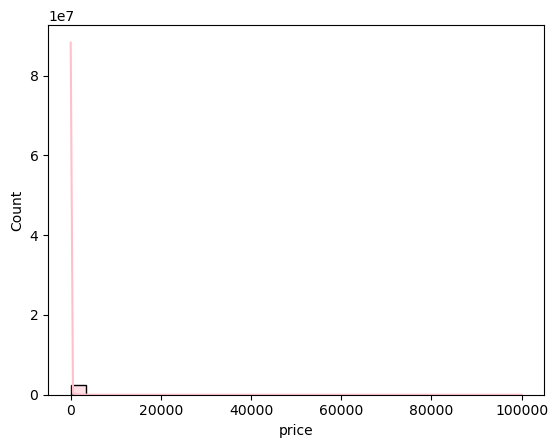

In [20]:
sns.histplot(df['price'], kde=True, bins=30, color="pink")

Yes, it is hard to read these diagrams because of the way the data is distributed. It could be solved by excluding outliers or plotting only within the IQR range. Yes, there products that are priced significantly higher than the rest.

<Axes: >

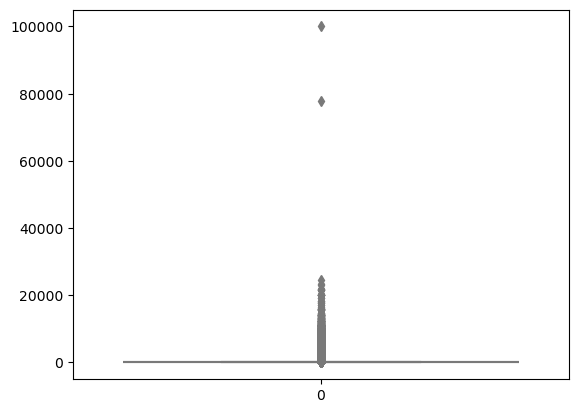

In [21]:
sns.boxplot(data = df['price'], color="lightblue")

## **Part 3: Unpacking Product Ratings**

#### **Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?**

#### **Measures of Centrality:**

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?

In [13]:
mean_rating = round(df['stars'].mean(), 2)
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

In [14]:
print("The mean rating is:", mean_price)
print("The median rating is:", median_price)
print("The mode rating is:", mode_price)

The mean rating is: 89.24
The median rating is: 19.09
The mode rating is: 9.99


The average rating of the products listed is 2.15. The most common rating is 0.0. The mode is lower than the average which suggests that the data is skewed by a number of highly rated products. 

#### **Measures of Dispersion:**

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

In [15]:
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
min_rating = df['stars'].min()
max_rating = df['stars'].max()
range_rating = max_rating - min_rating
quantiles_rating = df['stars'].quantile([0.25, 0.5, 0.75])
iqr_rating = df['stars'].quantile(0.75) - df['price'].quantile(0.25)

In [16]:
print("The variance is:", variance_rating)
print("The standard deviation is:", std_dev_rating)
print("The minimum price is:", min_rating)
print("The maximum price is:", max_rating)
print("The price range is:", range_rating)
print("The price quantiles are:", quantiles_rating)
print("The interquartile range is:", iqr_rating)

The variance is: 4.81743402976196
The standard deviation is: 2.1948653785054697
The minimum price is: 0.0
The maximum price is: 5.0
The price range is: 5.0
The price quantiles are: 0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64
The interquartile range is: -5.59


From these statistics, it seems that while the minimum rating is 0 and the maximum is 5, there's a wide range of ratings, indicated by the high variance and standard deviation. The interquartile range also suggests that there's significant variability in the ratings, particularly within the middle 50% of the data. This variability could imply inconsistent customer feedback.

#### **Shape of the Distribution:**

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

In [17]:
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

In [18]:
print("The skewness is:", skewness_rating)
print("The kurtosis is:", kurtosis_rating)

The skewness is: 0.08120735761080985
The kurtosis is: -1.9260061280432985


Given that the skewness is negative (-1.93), it suggests that the distribution is skewed to the left, meaning it leans towards lower values. Additionally, the kurtosis value is close to 0 (0.08), indicating that the distribution is relatively close to a normal distribution in terms of peakedness.

Therefore, based on these statistics, the distribution of the data tends to have lower values and is relatively close to a normal distribution in terms of its shape.

#### **Visualizations:**

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

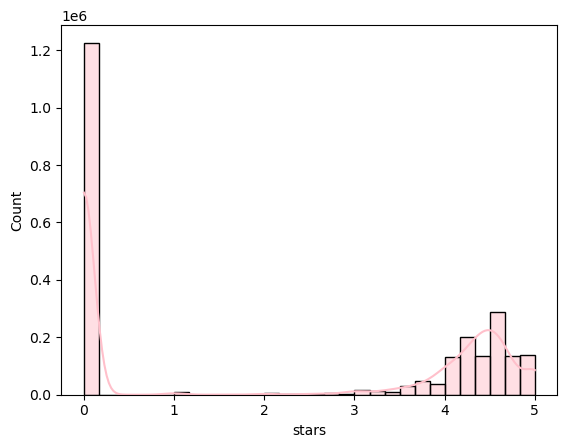

In [19]:
sns.histplot(df['stars'], kde=True, bins=30, color="pink")

Yes, there is a specific rating that is more common - 0 stars. 